In [13]:
import pandas as pd
from read_data import ReadData
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', 100)

In [22]:
path="r_files"
state_code = "06"
for pollutant in [ "PM2", "PM10", "O3"]:
    for lag in ["0-7", "0-14", "0-21"]:
        fname = "{}/R_data_{}_{}_{}".format(path, pollutant, state_code, lag)
        mortality_fname = "{}_COVID_mortality.csv".format(fname)
        cases_fname = "{}_COVID_cases.csv".format(fname)
        df_cases= pd.read_csv(cases_fname)
        df_mortality= pd.read_csv(mortality_fname)
        df = df_cases.merge(df_mortality[['date', 'county', 'deaths']], on=('date', 'county'))
        break

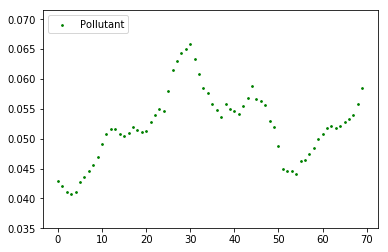

In [25]:
df = df[df['county']=='Los Angeles']
cases_log = df['cases'].apply(math.log)
deaths_log = df['deaths'].apply(math.log)
pollution = df['pollutant']
n = range(len(cases_log))
plt.close()
# plt.scatter(n, cases_log, color='b', s=3, label='COVID-19 Cases')
# plt.scatter(n, deaths_log, color='r', s=3, label='COVID-19 Mortalities')
plt.scatter(n, pollution, color='g', s=3, label='Pollutant')

plt.legend(loc='upper left')
plt.show()